In [1]:
#import des bibliothèques 

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#charger du jeu de données 
data = pd.read_csv("./HRDataset_v14.csv")

#afficher les premières lignes du dataset
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


## Les colonnes que nous allons utiliser pour notre analyse sont: 

EmpID : L'ID de l'employé. Utilisé comme identifiant unique pour chaque employé.

PerformanceScore : Le score de performance de l'employé. Principal indicateur utilisé pour analyser les performances des employés.

Absences : Le nombre d'absences de l'employé. Utilisé pour analyser l'impact des absences sur les performances.

Salary : Le salaire de l'employé. Peut être utilisé pour analyser s'il y a une corrélation entre le salaire et la performance.

DeptID : L'ID du département. Utilisé pour voir si certaines performances sont liées à des départements spécifiques.

EngagementSurvey : Le score de l'enquête d'engagement. Utilisé pour analyser la relation entre l'engagement et les performances.

EmpSatisfaction : Le niveau de satisfaction de l'employé. Utilisé pour étudier l'impact de la satisfaction sur les performances.

In [8]:
#vérification des valeurs manquantes 
data.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

### Il n'y a pas de valeurs manquantes dans les colonnes que nous avons choisies pour notre analyse, donc aucune modification n'est nécessaire

In [9]:
#afficher les statistiques descriptives des colonnes du dataset 

data.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


## Interprétation 

- PerformanceScore : La majorité des employés ont un score de performance autour de 3, avec une variation relativement faible, indiquant une performance relativement homogène.
- Absences : La moyenne des absences est d'environ 10 jours, avec des variations significatives. Quelques employés ont des absences assez élevées
- Salary : Les salaires varient considérablement, avec une moyenne d'environ 69,000. Il y a des employés qui gagnent beaucoup plus (jusqu'à 250,000)
- EngagementSurvey: La plupart des employés sont assez engagés, avec des scores de sondage d'engagement majoritairement élevés
- EmpSatisfaction : Le niveau de satisfaction est également élevé, avec une moyenne proche de 4

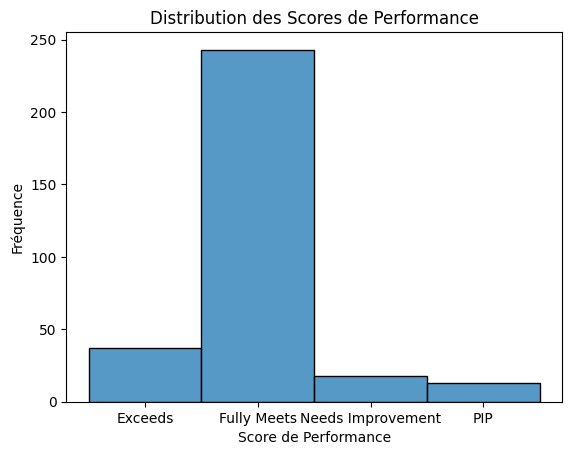

In [11]:
#visualistaion des distributions 

sns.histplot(data['PerformanceScore'], bins=10)
plt.title('Distribution des Scores de Performance')
plt.xlabel('Score de Performance')
plt.ylabel('Fréquence')
plt.show()

### Interprétation 

- "Fully meets needs" (Répond pleinement aux besoins) : est la fréquence la plus élevée, cela indique que la majorité des employés remplissent les attentes de l'entreprise. C'est un signe positif que la plupart des employés sont performants et atteignent les objectifs fixés

- "Exceeds" (Dépasse les attentes) : Fréquence modérée, un bon nombre d'employés dépassent les attentes, ce qui est un excellent indicateur de haute performance et d'engagement 

- "Improvement" (Doit s'améliorer) : Fréquence plus faible, certains employés doivent améliorer leurs performances. Cela peut signaler des besoins en formation ou en encadrement pour les aider à atteindre les standards.

- "PIP" (Plan d'Amélioration de la Performance) : Fréquence la plus faible, un petit nombre d'employés sont en dessous des attentes et nécessitent un suivi rapproché pour améliorer leurs performances.

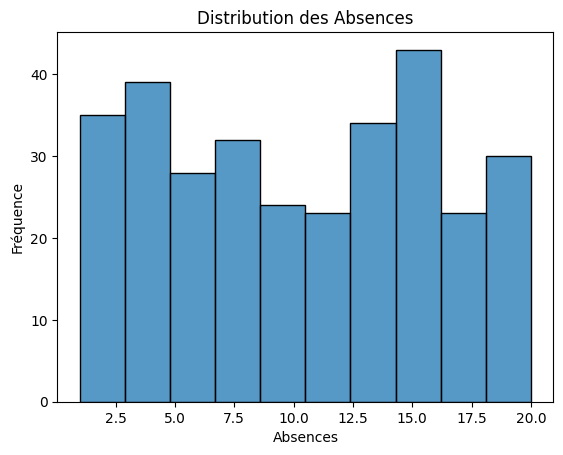

In [20]:
sns.histplot(data['Absences'], bins=10)
plt.title('Distribution des Absences')
plt.xlabel('Absences')
plt.ylabel('Fréquence')
plt.show()


### Interprétation 

La majorité des employés ont entre 5 et 15 absences, les fréquences plus faibles pour les intervalles extrêmes (0-5 absences et plus de 15 absences) indiquent qu'il y a moins d'employés avec très peu ou beaucoup d'absences.

Une concentration autour de 5 à 15 absences montre une tendance à un certain niveau de régularité dans les absences, sans extrêmes significatifs.
Cette répartition peut indiquer une politique de congé bien gérée, où la plupart des employés prennent un nombre raisonnable de jours de congé.

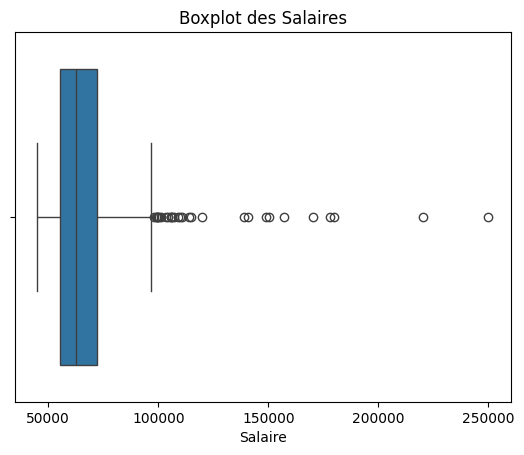

In [21]:
sns.boxplot(x=data['Salary'])
plt.title('Boxplot des Salaires')
plt.xlabel('Salaire')
plt.show()

### Interprétation des résultats 

La majorité des salaires se situe entre les premier et troisième quartiles.

La médiane indique le salaire au milieu de cette répartition, et la boîte montre la concentration des salaires autour de cette médiane.

On observe quelques valeurs aberrantes, ce qui signifie que certains salaires sont significativement plus élevées que les autres.

Ces outliers pourraient représenter des postes de direction, des primes exceptionnelles, ou des employés avec des contrats très différents.

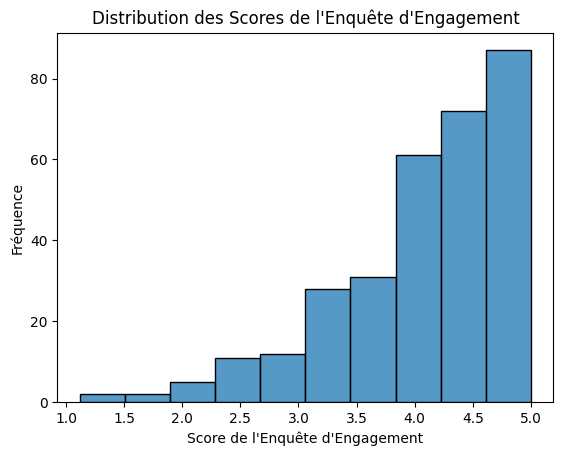

In [23]:
sns.histplot(data['EngagementSurvey'], bins=10)
plt.title('Distribution des Scores de l\'Enquête d\'Engagement')
plt.xlabel('Score de l\'Enquête d\'Engagement')
plt.ylabel('Fréquence')
plt.show()

### Interprétation 
La majorité des employés ont des scores d'engagement élevés (entre 4.0 et 5.0). Cela suggère que la plupart des employés sont très engagés dans leur travail, un haut niveau d'engagement est souvent associé à une meilleure performance, une satisfaction accrue au travail et une rétention des employés plus élevée.

Zones de Surveillance :

Bien que minoritaire, la présence de scores inférieurs à 3.0 indique qu'il y a quelques employés qui ne se sentent pas aussi engagés. Il peut être utile de comprendre et d'adresser leurs préoccupations pour améliorer leur expérience.

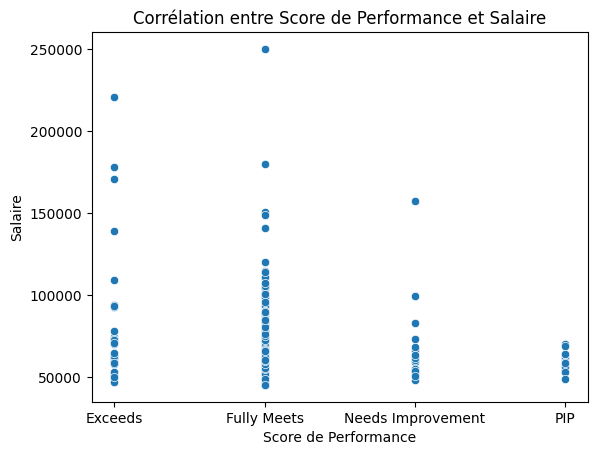

In [38]:
sns.scatterplot(x=data['PerformanceScore'], y=data['Salary'])
plt.title('Corrélation entre Score de Performance et Salaire')
plt.xlabel('Score de Performance')
plt.ylabel('Salaire')
plt.show()


### Interprétation 

Les catégories "Exceeds" et "Fully Meets" semblent avoir des salaires plus élevés en moyenne comparé aux catégories "Needs Improvement" et "PIP".

Cependant, il y a un chevauchement significatif des salaires entre les différentes catégories de performance, indiquant que des employés avec des scores de performance inférieurs peuvent avoir des salaires similaires à ceux avec des scores de performance plus élevés.

La large dispersion des salaires dans chaque catégorie de performance suggère que d'autres facteurs que la performance influencent les salaires. Ces facteurs peuvent inclure le poste, l'expérience, l'ancienneté, et les qualifications spécifiques.

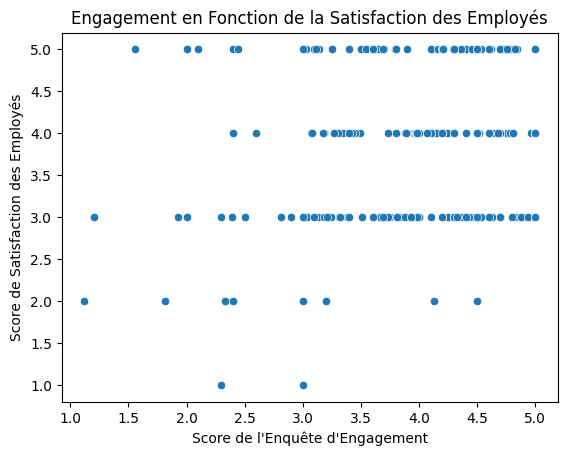

In [39]:
sns.scatterplot(x=data['EngagementSurvey'], y=data['EmpSatisfaction'])
plt.title('Engagement en Fonction de la Satisfaction des Employés')
plt.xlabel('Score de l\'Enquête d\'Engagement')
plt.ylabel('Score de Satisfaction des Employés')
plt.show()

### Interprétation

Une tendance générale montre que des scores d'engagement plus élevés sont souvent associés à des scores de satisfaction plus élevés.

Cependant, il existe des variations, certains employés ayant des scores de satisfaction élevés même avec des scores d'engagement plus bas et vice versa.

La forte concentration de points dans le quadrant supérieur droit (scores élevés sur les deux axes) suggère que l'engagement élevé des employés conduit souvent à une satisfaction élevée au travail.

Bien que la tendance générale montre une relation positive, il y a des points dispersés dans d'autres parties du graphique, indiquant que certains employés peuvent être satisfaits sans avoir des scores d'engagement élevés et vice versa. Cela pourrait être dû à des facteurs externes ou individuels influençant les scores.

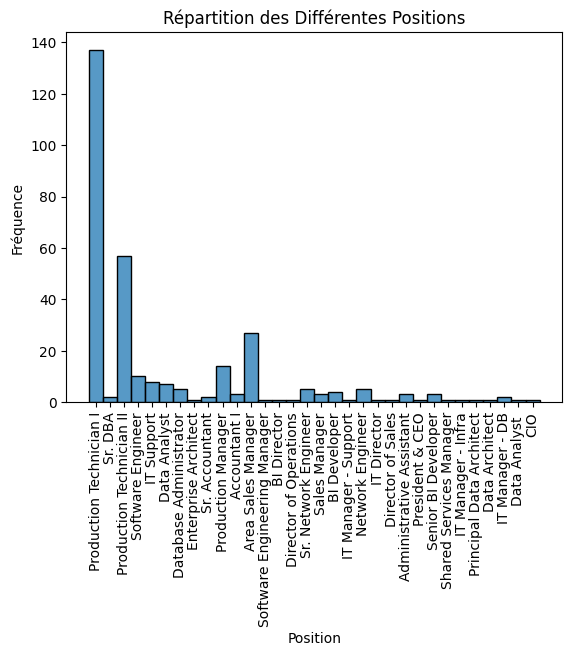

In [40]:
sns.histplot(data['Position'], bins=len(data['Position'].unique()), kde=False)
plt.title('Répartition des Différentes Positions')
plt.xlabel('Position')
plt.ylabel('Fréquence')
plt.xticks(rotation=90)  # Pour une meilleure lisibilité des étiquettes
plt.show()